Restore the Image.

In [1]:
# Import packages. Note that this notebook uses a slightly different structure from what I used in the .py file.
#(notably plt.imshow and cv2.imshow)
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.gray()

<Figure size 432x288 with 0 Axes>

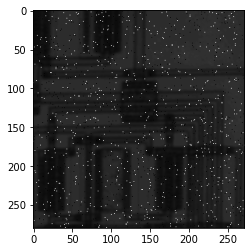

In [2]:
# Using OpenCV functions as per https://piazza.com/class/kemg8hc3toq3td?cid=79 (The lecturer said so)
image1 = cv2.imread("imageQ5.png", 0)  # Read image
plt.imshow(image1)

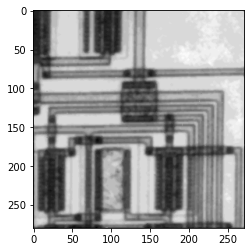

In [3]:
# Apply a low pass filter in Q4
lpfed = cv2.medianBlur(image1, 3)
plt.imshow(lpfed)

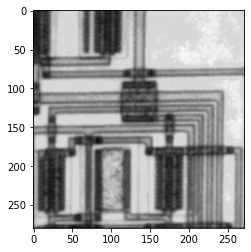

In [4]:
# Increase the contrast of the image
minimum = np.min(lpfed)  # Calculate the minimum value of image1
maximum = np.max(lpfed)  # Calculate the maximum value of image1
x = lpfed.shape[0]
y = lpfed.shape[1]
raw = np.zeros((x, y))
for i in range(x):
    for j in range(y):
        raw[i, j] = ((255-0)*(lpfed[i, j]-minimum)/(maximum-minimum)+0)
cont = raw.astype(np.uint8)
plt.imshow(cont)

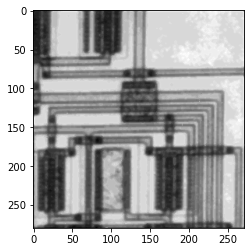

In [5]:
# Perform a High Pass Filter
lpf = cv2.GaussianBlur(cont, (5, 5),0)
hpf = cv2.subtract(cont, lpf)
hpfed = cv2.add(cont,hpf)
plt.imshow(hpfed)

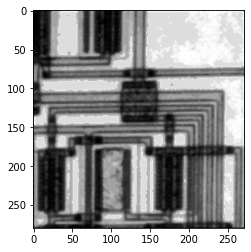

In [6]:
# Perform histogram equalization 
hist_eq = cv2.equalizeHist(hpfed)
plt.imshow(hist_eq)

In [7]:
# Show the result
result = hist_eq
cv2.imshow("Restored Image", result)

In [ ]:
# Save the result to file. The code is ran once before submitting.
cv2.imwrite("result.png", result)
cv2.waitKey(0)
cv2.destroyAllWindows()